In [1]:
import numpy as np

from engine import RMG, AdvRw
from agent import RandomAgent, IndQLearningAgent, FPLearningAgent

In [2]:
N_EXP = 10

r0ss = []
r1ss = []

smooth = 100

for n in range(N_EXP):
    batch_size = 1
    max_steps = 1
    gamma = 0.  # only one steps!

    mode = 'adversary'
    env = AdvRw(mode, p=0.6)  # p is only used in neutral mode
    env.reset()

    possible_actions = [0, 1]  # Target A or B

    p = IndQLearningAgent(possible_actions, n_states=1, learning_rate=0.1, epsilon=0.1, gamma=gamma)
    #p = FPLearningAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.1, epsilon=0.1, gamma=gamma)

    # Stateless interactions (agents do not have memory)
    s = 0

    n_iter = 1000 + smooth # because of the smoothening in the graphics

    r0s = []
    r1s = []

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide
            a0 = p.act()

            # World changes
            _, (r0, _), done, _ = env.step(a0)

            # Agents learn

            p.update(s, (a0, None), (r0, None), s )

            #s = new_s  #stateless!

            r0s.append(r0)

        env.reset()
    
    print(n)
    r0ss.append(r0s)
    r1ss.append(r1s)

0
1
2
3
4
5
6
7
8
9


In [56]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

We report moving avearage of rewards, since it's common in RL taks

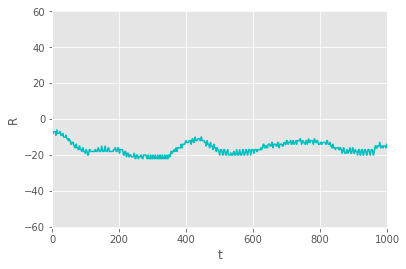

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

# We set a fancy theme
plt.style.use('ggplot')


plt.axis([0, max_steps*n_iter - smooth, -60.5, 60.5])


plt.plot(moving_average(r0s, smooth), 'c')
plt.plot(moving_average(r1s, smooth))
plt.xlabel('t');
plt.ylabel('R');

plt.savefig('img/4A_' + mode + '.png')

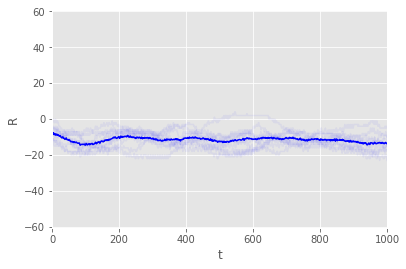

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

# We set a fancy theme
plt.style.use('ggplot')

plt.axis([0, max_steps*n_iter - smooth, -60.5, 60.5])
for i in range(N_EXP):
    plt.plot(moving_average(r0ss[i], 100), 'b', alpha=0.05)
    
plt.plot(moving_average(np.asarray(r0ss).mean(axis=0), 100), 'b', alpha=1)

plt.xlabel('t');
plt.ylabel('R');


plt.savefig('img/4A_' + mode + '.png')

For the neutral case (N=100):

In [43]:
moving_average(np.asarray(r0ss).mean(axis=0), 100).mean()

7.673836163836164

For the friend case (N=100):

In [53]:
moving_average(np.asarray(r0ss).mean(axis=0), 100).mean()

44.89634365634366